In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract 
import re
import pandas as pd

In [2]:
img = cv2.imread("/home/walaa-shaaban/Downloads/nat2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
img.shape

(630, 1000)

In [4]:
img = cv2.resize(img,(img.shape[1]*3, img.shape[0]*3), cv2.INTER_LINEAR)

In [5]:
img_dst = cv2.blur(img, (5, 5))

In [12]:
_, th = cv2.threshold(img_dst, 100, 255, cv2.THRESH_BINARY)


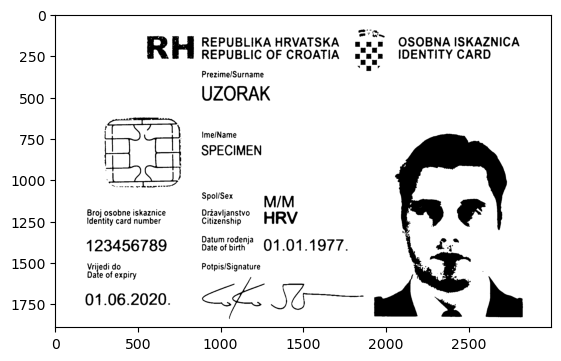

In [13]:
plt.imshow(th, 'gray');

In [14]:
text = pytesseract.image_to_string(th)

In [17]:
text

'R\n\nBroj osobne iskaznice\nIdentity card number\n\n123456789\n\nVrijedi do\nDate of expiry\n\n01.06.2020.\n\nREPUBLIKA HRVATSKA a «-\nREPUBLIC OF CROATIA ata®\na |\n\nPrezime/Surname\n\nUZORAK\n\nIme/Name\n\nSPECIMEN\n\nSpol/Sex M/M\n\nDrzavijanst\n\nCitizenship =~ HRV\n\nDat denj\n\npate of birth ~=01.01.1977.\n\nPotpis/Signature\n\nOSOBNA ISKAZNICA\nIDENTITY CARD\n\n'

In [42]:
card_number = '\d{9}'
sex = '\Sex \w\W\w'
expired = '\d\.\d+\.\d+'
birth_date = 'birth\W\W\W\d+\W\d+\W\d+'
surname = 'ame\\n\\n\w+'
name = 'Name\\n\\n\w+'
republic = '«-\\n\w+\s\w+\s\w+'


In [70]:
data = [{
    'republic' : re.search(republic, text).group()[5:],
    'card_number' : re.search(card_number, text).group(),
    'surname' : re.search(surname, text).group()[6:],
    'name' : re.search(name, text).group()[6:],
    'sex' : re.search(sex, text).group()[4:],
    'birthdate': re.search(birth_date, text).group()[8:],
    'expired' : re.search(expired, text).group()
    
}]

In [71]:
df = pd.DataFrame(data)

In [72]:
df

,republic,card_number,surname,name,sex,birthdate,expired
0,PUBLIC OF CROATIA,123456789,ZORAK,SPECIMEN,M/M,01.01.1977,1.06.2020
